In [62]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from array import array

import string

In [63]:
auto = pd.read_csv('D:/GL/fifa.csv')
print(auto.head(5))

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

In [64]:
auto=auto.replace('\u20AC','',regex=True)
print(auto.head(5))
print(auto['Value'].head(5))

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

In [65]:
#Working ones
auto['Value']=auto['Value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
print(auto['Value'].head(5))

auto['Wage']=auto['Wage'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
print(auto['Wage'].head(5))



0    110500000
1     77000000
2    118500000
3     72000000
4    102000000
Name: Value, dtype: int32
0    565000
1    405000
2    290000
3    260000
4    355000
Name: Wage, dtype: int32


In [66]:
auto['Release Clause'].fillna(0, inplace = True) 
auto['Release Clause']=auto['Release Clause'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
print(auto['Release Clause'].head(5))
# print(auto['Release Clause'].dtype)

0    226500000
1    127100000
2    228100000
3    138600000
4    196400000
Name: Release Clause, dtype: int32


In [50]:
auto['Weight'].fillna(0, inplace = True)
auto['Weight']=auto['Weight'].replace({'K': '*1e3', 'M': '*1e6','lbs':''}, regex=True).map(pd.eval).astype(int)
print(auto['Weight'].head(5))

0    159
1    183
2    150
3    168
4    154
Name: Weight, dtype: int32


In [67]:
auto['Height'].fillna(0, inplace = True)
auto['Height']=auto['Height'].replace({'K': '*1e3', 'M': '*1e6','lbs':'',"'":"."}, regex=True).map(pd.eval).astype(float)
print(auto['Height'].head(5))

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64


In [68]:
print(auto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null int32
Wage                        18207 non-null int32
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null o

In [69]:
auto["Joined"]= pd.to_datetime(auto["Joined"])
print(auto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null int32
Wage                        18207 non-null int32
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null o

In [70]:
print(auto["Joined"].head(5))

0   2004-07-01
1   2018-07-10
2   2017-08-03
3   2011-07-01
4   2015-08-30
Name: Joined, dtype: datetime64[ns]


In [71]:
auto['Joinedyear'] = auto["Joined"].dt.year
auto['Joinedmonth'] = auto["Joined"].dt.month
auto['JoinedDay'] = auto["Joined"].dt.day

In [72]:
print(auto['JoinedDay'].head())

0     1.0
1    10.0
2     3.0
3     1.0
4    30.0
Name: JoinedDay, dtype: float64


In [73]:
print(auto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 63 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null int32
Wage                        18207 non-null int32
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null o

In [98]:
uber = pd.read_csv('D:/GL/uberdrive.csv')
print(uber.head(5))

      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE* MONTH OF TRIP*  DAY OF TRIP*  MONTH INDEX*  
0     5.1   Meal/Entertain        January           1.0           1.0  
1     5.0              NaN        January           2.0           1.0  
2     4.8  Errand/Supplies        January           2.0           1.0  
3     4.7          Meeting        January           5.0           1.0  
4    63.7   Customer Visit        January           6.0           1.0  


In [99]:
# uber["START_DATE*"]= pd.to_datetime(uber["START_DATE*"],format='%m/%d/%Y %H:%M.%f')
# uber["START_DATE*"] = pd.to_datetime(uber["START_DATE*"], format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M')
#Working One
# uber["START_DATE*"] = pd.to_datetime(uber["START_DATE*"],errors='coerce', format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M')
uber["START_DATE*"] = pd.to_datetime(uber["START_DATE*"],errors='coerce', format='%m/%d/%Y %H:%M')
print(uber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
START_DATE*       1155 non-null datetime64[ns]
END_DATE*         1155 non-null object
CATEGORY*         1155 non-null object
START*            1155 non-null object
STOP*             1155 non-null object
MILES*            1156 non-null float64
PURPOSE*          653 non-null object
MONTH OF TRIP*    1155 non-null object
DAY OF TRIP*      1155 non-null float64
MONTH INDEX*      1155 non-null float64
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 90.4+ KB
None


In [102]:
uber["TRIP_START_DAY"]=uber["START_DATE*"].dt.day
uber["TRIP_START_DATE"]=uber["START_DATE*"].dt.date
uber["TRIP_START_YEAR"]=uber["START_DATE*"].dt.year
uber["TRIP_START_HOUR"]=uber["START_DATE*"].dt.hour
uber["TRIP_START_MINUTE"]=uber["START_DATE*"].dt.minute
print(uber.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 15 columns):
START_DATE*          1155 non-null datetime64[ns]
END_DATE*            1155 non-null object
CATEGORY*            1155 non-null object
START*               1155 non-null object
STOP*                1155 non-null object
MILES*               1156 non-null float64
PURPOSE*             653 non-null object
MONTH OF TRIP*       1155 non-null object
DAY OF TRIP*         1155 non-null float64
MONTH INDEX*         1155 non-null float64
TRIP_START_DAY       1155 non-null float64
TRIP_START_DATE      1155 non-null object
TRIP_START_YEAR      1155 non-null float64
TRIP_START_HOUR      1155 non-null float64
TRIP_START_MINUTE    1155 non-null float64
dtypes: datetime64[ns](1), float64(7), object(7)
memory usage: 135.5+ KB
None


In [104]:
uber["END_DATE*"] = pd.to_datetime(uber["END_DATE*"],errors='coerce', format='%m/%d/%Y %H:%M')
uber["TRIP_END_DAY"]=uber["END_DATE*"].dt.day
uber["TRIP_END_DATE"]=uber["END_DATE*"].dt.date
uber["TRIP_END_YEAR"]=uber["END_DATE*"].dt.year
uber["TRIP_END_HOUR"]=uber["END_DATE*"].dt.hour
uber["TRIP_END_MINUTE"]=uber["END_DATE*"].dt.minute
print(uber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 20 columns):
START_DATE*          1155 non-null datetime64[ns]
END_DATE*            1155 non-null datetime64[ns]
CATEGORY*            1155 non-null object
START*               1155 non-null object
STOP*                1155 non-null object
MILES*               1156 non-null float64
PURPOSE*             653 non-null object
MONTH OF TRIP*       1155 non-null object
DAY OF TRIP*         1155 non-null float64
MONTH INDEX*         1155 non-null float64
TRIP_START_DAY       1155 non-null float64
TRIP_START_DATE      1155 non-null object
TRIP_START_YEAR      1155 non-null float64
TRIP_START_HOUR      1155 non-null float64
TRIP_START_MINUTE    1155 non-null float64
TRIP_END_DAY         1155 non-null float64
TRIP_END_DATE        1155 non-null object
TRIP_END_YEAR        1155 non-null float64
TRIP_END_HOUR        1155 non-null float64
TRIP_END_MINUTE      1155 non-null float64
dtypes: datetime64[ns](2), 

In [105]:
print(uber.head(5))

          START_DATE*           END_DATE* CATEGORY*       START*  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

             STOP*  MILES*         PURPOSE* MONTH OF TRIP*  DAY OF TRIP*  \
0      Fort Pierce     5.1   Meal/Entertain        January           1.0   
1      Fort Pierce     5.0              NaN        January           2.0   
2      Fort Pierce     4.8  Errand/Supplies        January           2.0   
3      Fort Pierce     4.7          Meeting        January           5.0   
4  West Palm Beach    63.7   Customer Visit        January           6.0   

   MONTH INDEX*  TRIP_START_DAY TRIP_START_DATE  TRIP_START_YEAR  \
0           1.0             1.0      2016-01-01           2016.0  

In [125]:
convert_dict = {'DAY OF TRIP*': int, 
                'MONTH INDEX*': int,
                'TRIP_START_DAY':int,
                'TRIP_START_DATE':int,
                'TRIP_START_YEAR':int,
                'TRIP_START_HOUR':int,
                'TRIP_START_MINUTE':int,
                'TRIP_END_DAY':int,
                'TRIP_END_DATE':int,
                'TRIP_END_YEAR':int,
                'TRIP_END_HOUR':int,
                'TRIP_END_MINUTE':int
               } 
uber = uber.astype(convert_dict,errors='coerce') 

# uber = uber.astype({"DAY OF TRIP*": int, "MONTH INDEX*": int})
# pd.to_numeric(uber['DAY OF TRIP*'], downcast='integer')
# uber[['DAY OF TRIP*', 'MONTH INDEX*']] = uber[['MONTH INDEX*', 'MONTH INDEX*']].astype(int)
print(uber.info())

ValueError: Cannot convert non-finite values (NA or inf) to integer

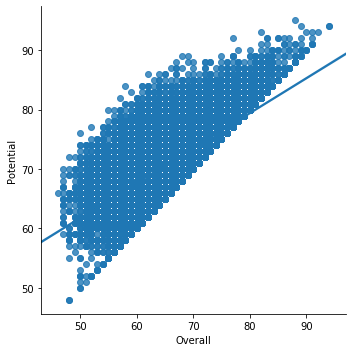

In [8]:
sns.lmplot(x="Overall", y="Potential", data=auto)